In [1]:
!python --version

Python 3.10.13


In [11]:
!pip install tensorflow==2.15.0 scipy==1.11.4 imbalanced-learn scikit-plot ipykernel numpy pandas scikit-learn seaborn matplotlib opencv-python opencv-python-headless wurlitzer

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import scikitplot
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [4]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

# Check if GPU is used by TensorFlow
print("GPU in use: ", tf.test.is_gpu_available())

Num GPUs Available:  2
TensorFlow Version:  2.15.0
GPU in use:  True


In [5]:
df = pd.read_csv('/kaggle/input/vinmammo-75-fullsize/full_df.csv')
df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
0,9bab34fb6637f3921df32b4a215385ed,e3531910704e16940109920a082a44c0,cae99f03d6140de07f07aefb4cd56894,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
1,c56cc50b66e5dec5669109775a6e86b1,fc2a541686a034dcee5210351421281f,b006f3d0f9d31b9f5b2bff0590bc9329,L,CC,2812,2012,BI-RADS 1,DENSITY A,training
2,68b4c3418c32a4ceded51336795166d8,f7fb64af935152315c2712e0073cf8cd,296b49445da9a1c1cd74309803fb1231,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
3,968fd0c76a33137d8c227041ea728bf6,f3de135bea9911aa421a4b51bab4c0d1,c89a8dd3fc80a4927de00ada5668293f,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
4,c488d7ef379be78343fd91eefa9cc477,f70111ca12d8c3650bdb048138e3d3c5,bac4fa932577504e96b0502fcfd600e5,L,CC,2812,2012,BI-RADS 1,DENSITY A,training
...,...,...,...,...,...,...,...,...,...,...
15999,5e9175554fa9d6b9fb424d7065be4f20,a07d1cc99c7611c815ea99acb324f3b6,4adfc32f03228403f518f24e9b9313cf,R,MLO,3518,2800,BI-RADS 1,DENSITY C,test
16000,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,4835a79d7e25eebd20104e7147cbcfb4,L,CC,3518,2800,BI-RADS 2,DENSITY C,test
16001,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,ebb437593a3fc80277296638f0607f5b,L,MLO,3518,2800,BI-RADS 2,DENSITY C,test
16002,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,9188a01b6b648cee39fb70702a860141,R,CC,3518,2800,BI-RADS 1,DENSITY C,test


In [6]:
df['image_path'] = '/kaggle/input/vinmammo-75-fullsize/png/png/' + df['study_id'] + '/' + df['image_id'] + '.png'
df['label'] = df['breast_birads'].map({'BI-RADS 1': '0', 
                                       'BI-RADS 2': '0', 
                                       'BI-RADS 3': '1', 
                                       'BI-RADS 4': '1', 
                                       'BI-RADS 5': '1'})
df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split,image_path,label
0,9bab34fb6637f3921df32b4a215385ed,e3531910704e16940109920a082a44c0,cae99f03d6140de07f07aefb4cd56894,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,/kaggle/input/vinmammo-75-fullsize/png/png/9ba...,0
1,c56cc50b66e5dec5669109775a6e86b1,fc2a541686a034dcee5210351421281f,b006f3d0f9d31b9f5b2bff0590bc9329,L,CC,2812,2012,BI-RADS 1,DENSITY A,training,/kaggle/input/vinmammo-75-fullsize/png/png/c56...,0
2,68b4c3418c32a4ceded51336795166d8,f7fb64af935152315c2712e0073cf8cd,296b49445da9a1c1cd74309803fb1231,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,/kaggle/input/vinmammo-75-fullsize/png/png/68b...,0
3,968fd0c76a33137d8c227041ea728bf6,f3de135bea9911aa421a4b51bab4c0d1,c89a8dd3fc80a4927de00ada5668293f,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,/kaggle/input/vinmammo-75-fullsize/png/png/968...,0
4,c488d7ef379be78343fd91eefa9cc477,f70111ca12d8c3650bdb048138e3d3c5,bac4fa932577504e96b0502fcfd600e5,L,CC,2812,2012,BI-RADS 1,DENSITY A,training,/kaggle/input/vinmammo-75-fullsize/png/png/c48...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15999,5e9175554fa9d6b9fb424d7065be4f20,a07d1cc99c7611c815ea99acb324f3b6,4adfc32f03228403f518f24e9b9313cf,R,MLO,3518,2800,BI-RADS 1,DENSITY C,test,/kaggle/input/vinmammo-75-fullsize/png/png/5e9...,0
16000,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,4835a79d7e25eebd20104e7147cbcfb4,L,CC,3518,2800,BI-RADS 2,DENSITY C,test,/kaggle/input/vinmammo-75-fullsize/png/png/bbe...,0
16001,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,ebb437593a3fc80277296638f0607f5b,L,MLO,3518,2800,BI-RADS 2,DENSITY C,test,/kaggle/input/vinmammo-75-fullsize/png/png/bbe...,0
16002,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,9188a01b6b648cee39fb70702a860141,R,CC,3518,2800,BI-RADS 1,DENSITY C,test,/kaggle/input/vinmammo-75-fullsize/png/png/bbe...,0


In [7]:
train_df = df[df['split'] == 'training']
tmp_test_df = df[df['split'] == 'test']

test_df, val_df = train_test_split(tmp_test_df, test_size=0.5, stratify=tmp_test_df['label'], random_state=42)

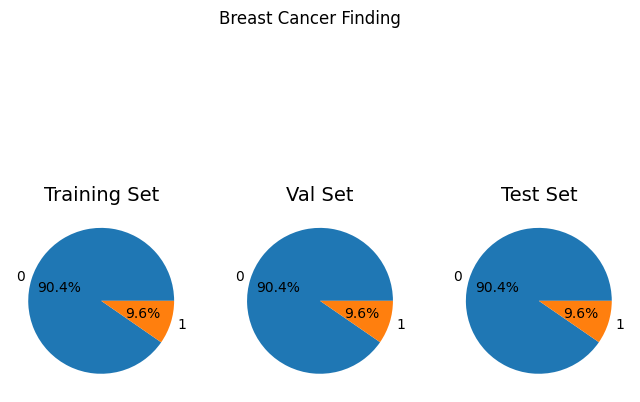

In [8]:
# label distributions
import matplotlib.pyplot as plt
value = train_df['label'].value_counts()
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
fig.suptitle('Breast Cancer Finding')
axs[0].pie(value, labels=value.index, autopct='%1.1f%%')
axs[0].set_title('Training Set', fontsize=14)

# label distributions
value_1 = val_df['label'].value_counts()
axs[1].pie(value_1, labels=value_1.index, autopct='%1.1f%%')
axs[1].set_title('Val Set', fontsize=14)

# label distributions
value_2 = test_df['label'].value_counts()
axs[2].pie(value_2, labels=value_2.index, autopct='%1.1f%%')
axs[2].set_title('Test Set', fontsize=14)

plt.show()

In [35]:
def create_gens(train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors.
    '''

    color = 'rgb'
    img_size = (224, 224)

    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))

    tr_gen = ImageDataGenerator(horizontal_flip= True)
    ts_gen = ImageDataGenerator()
    
    # Extract features and labels from the training dataframe
    X_train = train_df[['image_path']].values  # Assuming 'image_path' is the column with image paths
    y_train = train_df['label'].values

    # Apply random undersampling using RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

    # Combine resampled features and labels into a new DataFrame
    train_resampled_df = pd.DataFrame({'image_path': X_resampled.flatten(), 'label': y_resampled})
    
    # Create ImageDataGenerator for the resampled training data
    train_gen = tr_gen.flow_from_dataframe(train_resampled_df, x_col='image_path', y_col='label', target_size=img_size, class_mode='categorical',
                                           color_mode=color, shuffle=True, batch_size=batch_size)

#     train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
#                                            color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
                                           color_mode= color, shuffle= False, batch_size= batch_size)

    test_gen = ts_gen.flow_from_dataframe(test_df, x_col= 'image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
                                          color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [36]:
batch_size = 16
train_gen, valid_gen, test_gen = create_gens(train_df, val_df, test_df, batch_size)

Found 2312 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


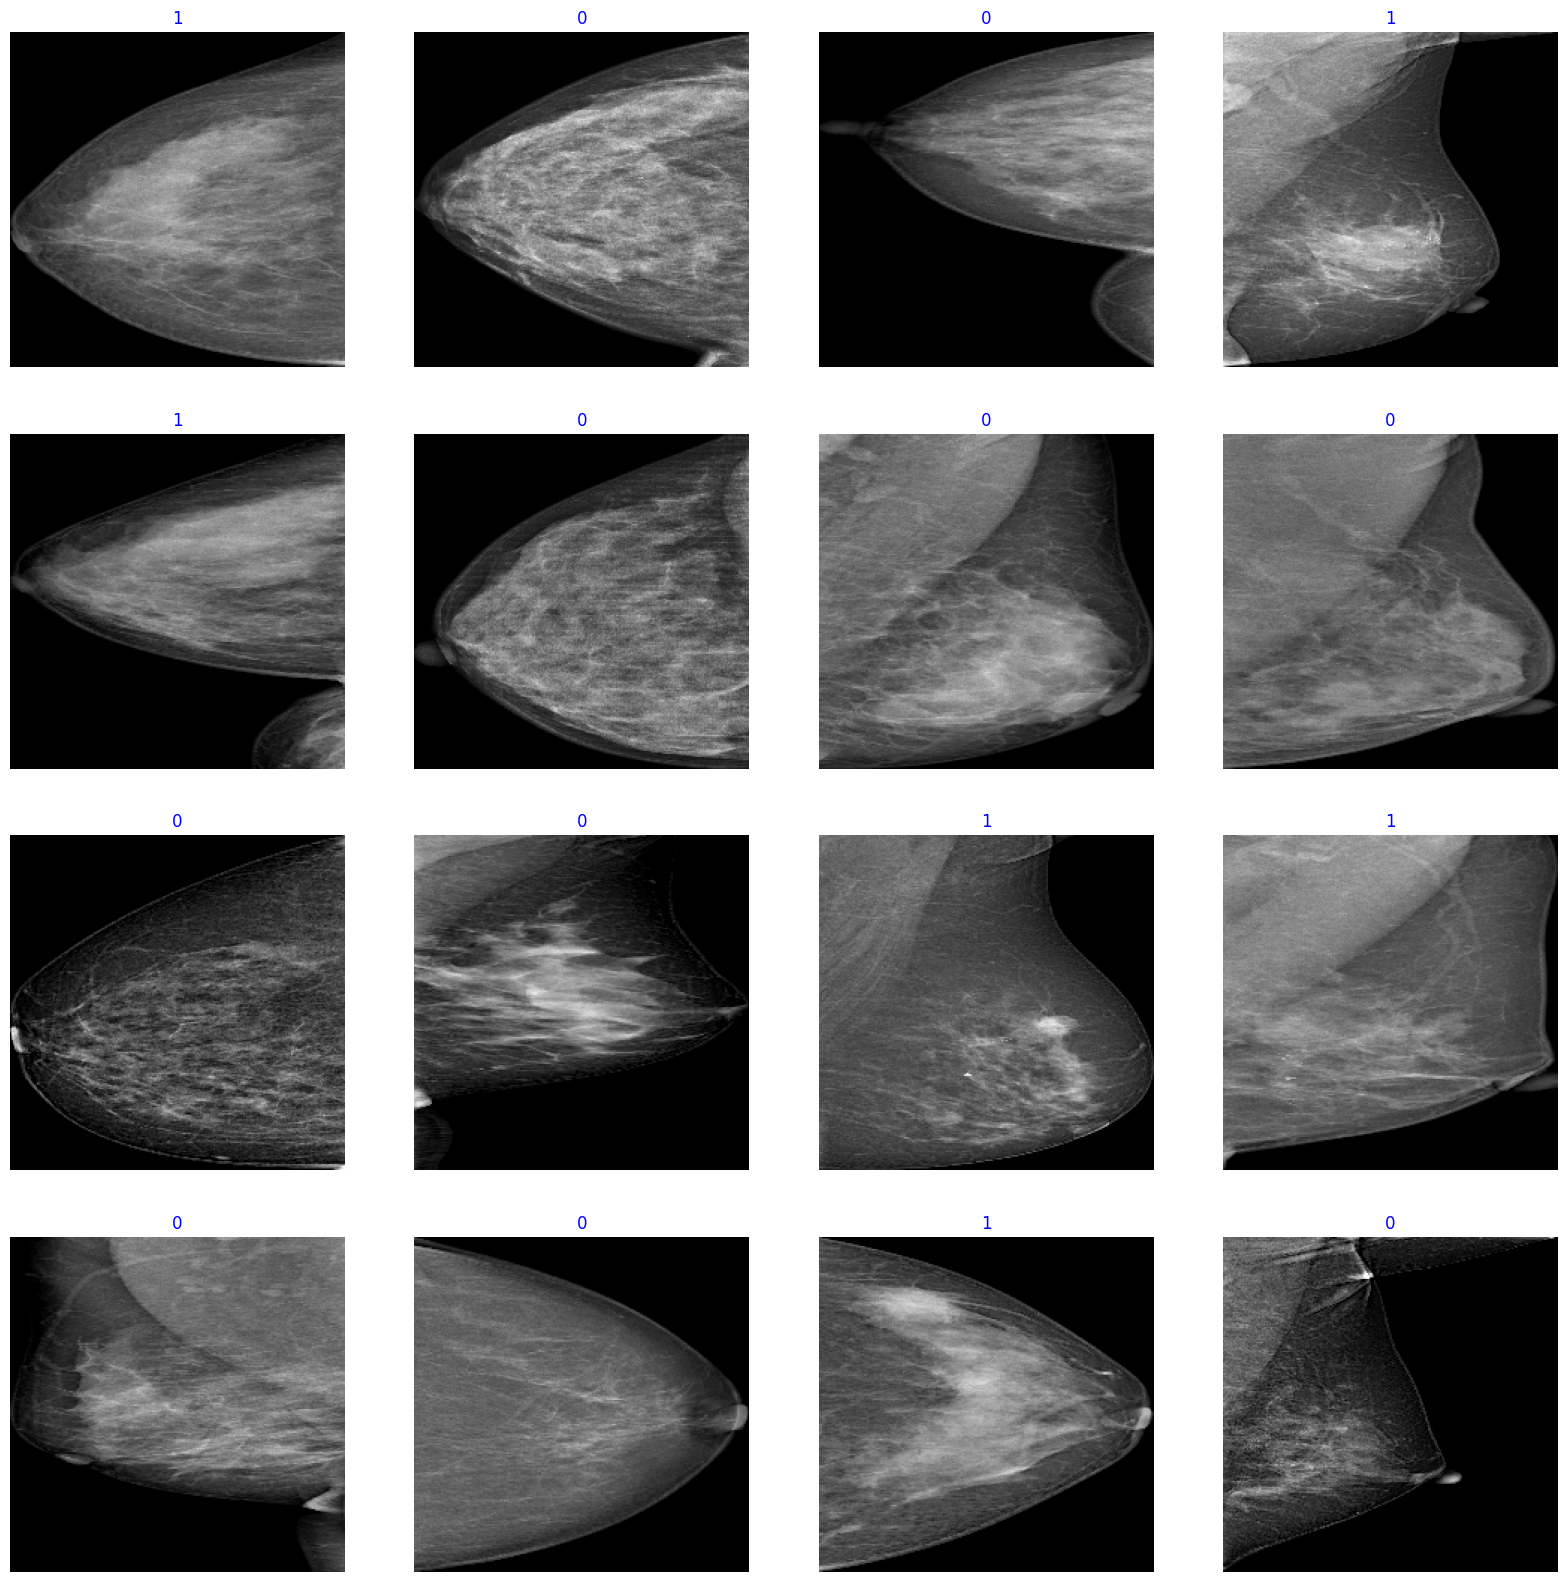

In [37]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show()

In [38]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,
                                                               weights="imagenet",
                                                               input_shape=img_shape, pooling='max')


model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(512, kernel_regularizer=regularizers.l2(0.016),
               activity_regularizer=regularizers.l1(0.006),
               bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.5),
#     Dense(251, kernel_regularizer=regularizers.l2(0.016),
#                activity_regularizer=regularizers.l1(0.006),
#                bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dense(class_count, activation= 'softmax')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization_1 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 4711589 (17.97 MB)
Trainable params: 466

In [39]:
# model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
#               loss=tf.keras.losses.CategoricalFocalCrossentropy(alpha=0.25, gamma=2.0),
#               metrics=[tf.keras.metrics.Recall(name='recall'),
#                        tf.keras.metrics.Precision(name='precision'),
#                        tf.keras.metrics.AUC(curve='PR', name='pr_auc'),
#                        tf.keras.metrics.AUC(curve='ROC', name='auc'),
#                        'accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.AUC(curve='ROC', name='auc'),
                        tf.keras.metrics.AUC(curve='PR', name='pr_auc'),
                        'accuracy'])

In [40]:
import os
output_dir = '/kaggle/working/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

checkpoint_filepath = output_dir + '/best_model.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   monitor='val_loss',
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='min',
                                   verbose=1)

In [42]:
epochs = 50
history = model.fit(train_gen, epochs=epochs, verbose=1,
                    validation_data= valid_gen,
                    validation_steps=None, shuffle=False,
#                     class_weight=dict(enumerate(class_weights)),
                    callbacks=[early_stopping, model_checkpoint]
                    )

Epoch 1/50


2024-03-10 02:56:47.934208: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


145/145 [==============================] - ETA: 0s - loss: 10.8318 - recall: 0.5268 - precision: 0.5268 - auc: 0.5392 - pr_auc: 0.5337 - accuracy: 0.5268
Epoch 1: val_loss improved from inf to 8.29679, saving model to /kaggle/working/output/best_model.h5
145/145 [==============================] - 140s 770ms/step - loss: 10.8318 - recall: 0.5268 - precision: 0.5268 - auc: 0.5392 - pr_auc: 0.5337 - accuracy: 0.5268 - val_loss: 8.2968 - val_recall: 0.7615 - val_precision: 0.7615 - val_auc: 0.8025 - val_pr_auc: 0.7793 - val_accuracy: 0.7615
Epoch 2/50
145/145 [==============================] - ETA: 0s - loss: 7.0633 - recall: 0.5549 - precision: 0.5549 - auc: 0.5809 - pr_auc: 0.5631 - accuracy: 0.5549
Epoch 2: val_loss improved from 8.29679 to 6.57534, saving model to /kaggle/working/output/best_model.h5
145/145 [==============================] - 111s 766ms/step - loss: 7.0633 - recall: 0.5549 - precision: 0.5549 - auc: 0.5809 - pr_auc: 0.5631 - accuracy: 0.5549 - val_loss: 6.5753 - val_re

In [43]:
model.save_weights(f'{output_dir}/model_weights.h5')
val_df.to_csv(f'{output_dir}/val_df.csv')
test_df.to_csv(f'{output_dir}/test_df.csv')

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']

recall = history.history['recall']
val_recall = history.history['val_recall']

precision = history.history['precision']
val_precision = history.history['val_precision']

# f1 = history.history['f1_score']
# val_f1 = history.history['val_f1_score']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(recall))

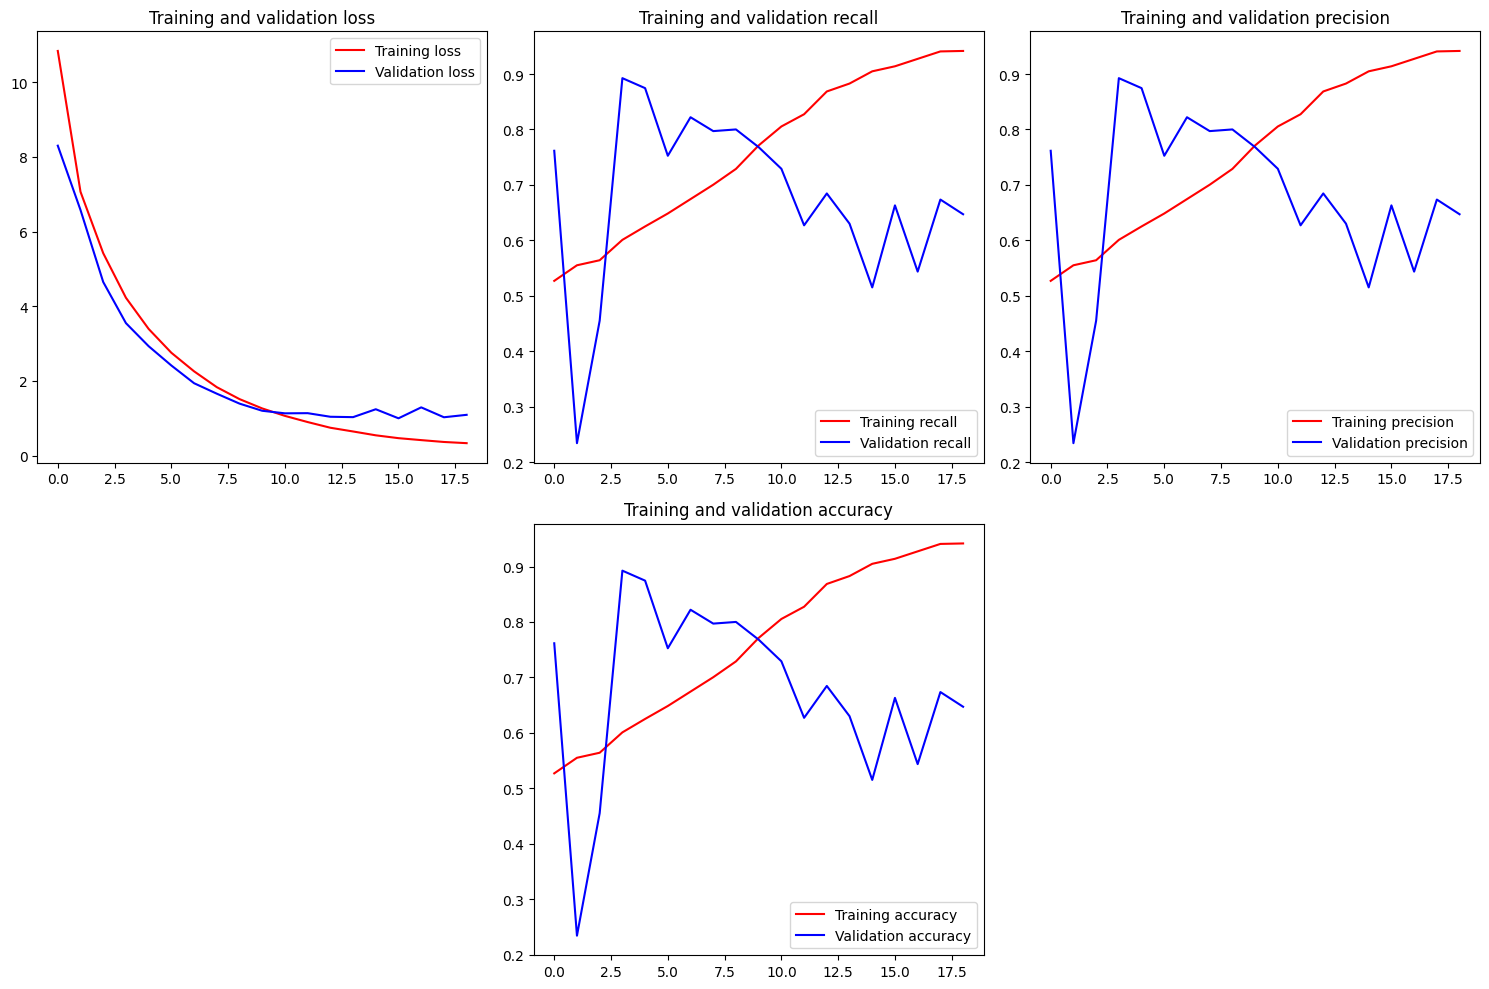

In [45]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plotting 
axs[0, 0].plot(epochs, loss, 'r', label='Training loss')
axs[0, 0].plot(epochs, val_loss, 'b', label='Validation loss')
axs[0, 0].set_title('Training and validation loss')
axs[0, 0].legend(loc=0)

axs[0, 1].plot(epochs, recall, 'r', label='Training recall')
axs[0, 1].plot(epochs, val_recall, 'b', label='Validation recall')
axs[0, 1].set_title('Training and validation recall')
axs[0, 1].legend(loc=0)

axs[0, 2].plot(epochs, precision, 'r', label='Training precision')
axs[0, 2].plot(epochs, val_precision, 'b', label='Validation precision')
axs[0, 2].set_title('Training and validation precision')
axs[0, 2].legend(loc=0)
# Hide the empty subplot
# axs[0, 2].axis('off')

# axs[1, 0].plot(epochs, f1, 'r', label='Training f1_score')
# axs[1, 0].plot(epochs, val_f1, 'b', label='Validation f1_score')
# axs[1, 0].set_title('Training and validation f1_score')
# axs[1, 0].legend(loc=0)
axs[1, 0].axis('off')

axs[1, 1].plot(epochs, accuracy, 'r', label='Training accuracy')
axs[1, 1].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
axs[1, 1].set_title('Training and validation accuracy')
axs[1, 1].legend(loc=0)
# axs[1, 1].axis('off')


# Hide the empty subplot
axs[1, 2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [46]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

25/25 [==============================] - 52s 2s/step - loss: 1.1424 - recall: 0.6410 - precision: 0.6410 - auc: 0.6706 - pr_auc: 0.6433 - accuracy: 0.6410


In [47]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

25/25 [==============================] - 52s 2s/step
[1 0 0 ... 1 0 1]


In [48]:
# Save model predction to csv
y_true = test_gen.classes
# Get filenames from the test generator
filenames = test_gen.filenames

# Create a DataFrame with predictions and true labels
results = pd.DataFrame({
    "img_path": filenames,
    "true_class": y_true,
    "predicted": y_pred
})

# Save the DataFrame to a CSV file
results.to_csv(f"{output_dir}/prediction_result.csv", index=False)
results

,img_path,true_class,predicted
0,/kaggle/input/vinmammo-75-fullsize/png/png/b29...,1,1
1,/kaggle/input/vinmammo-75-fullsize/png/png/d03...,0,0
2,/kaggle/input/vinmammo-75-fullsize/png/png/1fe...,0,0
3,/kaggle/input/vinmammo-75-fullsize/png/png/2db...,0,1
4,/kaggle/input/vinmammo-75-fullsize/png/png/d90...,0,0
...,...,...,...
1995,/kaggle/input/vinmammo-75-fullsize/png/png/4f2...,0,0
1996,/kaggle/input/vinmammo-75-fullsize/png/png/9b7...,0,0
1997,/kaggle/input/vinmammo-75-fullsize/png/png/fbc...,0,1
1998,/kaggle/input/vinmammo-75-fullsize/png/png/80c...,0,0


In [49]:
# create function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title, normalized=True):
    """plots a normalized confusion matrix as a heatmap."""
    if normalized == True:
        # Calculate row sums
        row_sums = cm.sum(axis=1, keepdims=True)
        # Normalize confusion matrix
        normalized_cm = cm / row_sums
        plot_cm = normalized_cm
    else:
        plot_cm = cm
    plt.figure(figsize=(8, 6))
    sns.heatmap(plot_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1808
           1       0.15      0.61      0.25       192

    accuracy                           0.64      2000
   macro avg       0.55      0.63      0.51      2000
weighted avg       0.86      0.64      0.71      2000



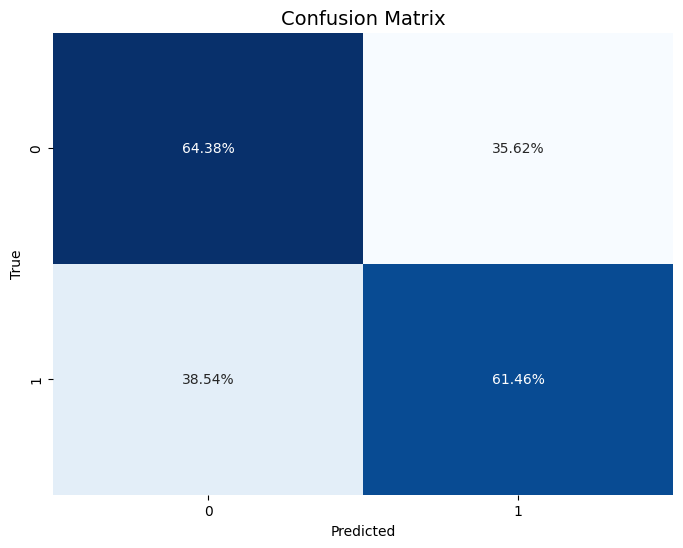

In [50]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names=classes))
# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm=cm, labels=classes, title='Confusion Matrix')

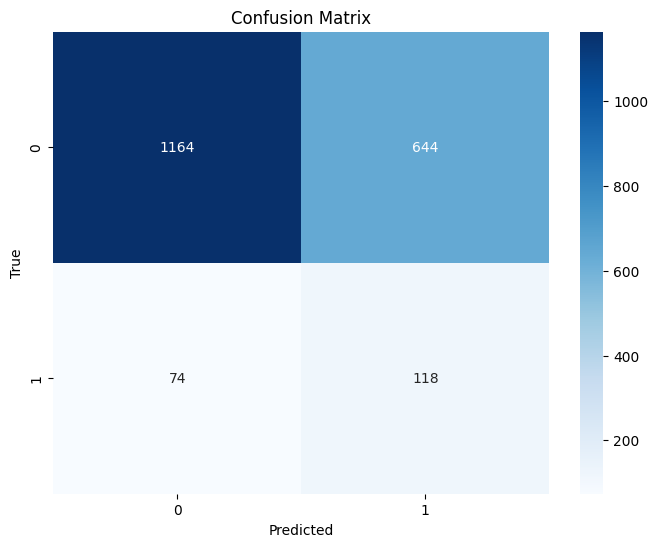

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_gen is your test data generator and model is your trained model
# predictions = model.predict(test_gen)
# predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_gen.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("F1 Score: {}".format(f1_score(y_true,y_pred)))
print("Recall score: {}".format(recall_score(y_true,y_pred)))
print("Precision score: {}".format(precision_score(y_true,y_pred)))

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print the results
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

F1 Score: 0.24737945492662475
Recall score: 0.6145833333333334
Precision score: 0.15485564304461943
Sensitivity (True Positive Rate): 0.6146
Specificity (True Negative Rate): 0.6438


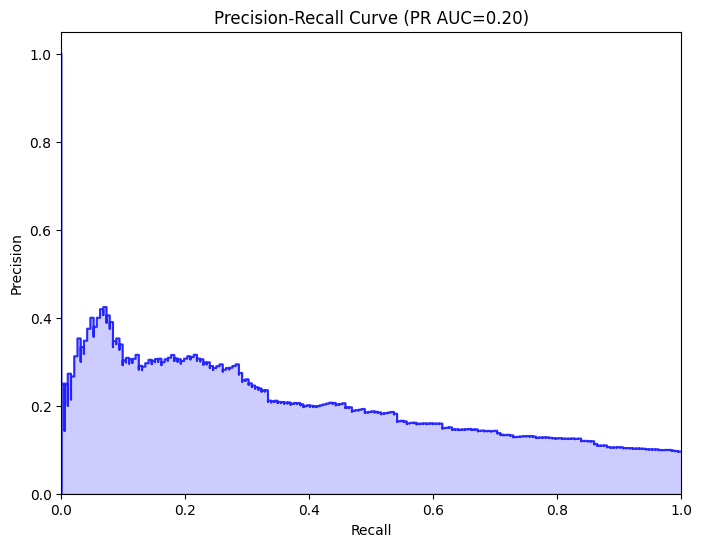

In [52]:
from sklearn.metrics import auc, precision_recall_curve, f1_score, average_precision_score

# Make predictions on the test data
y_scores = preds

y_scores = y_scores[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)  # Assuming binary classification, use y_scores[:, 1]

# Calculate AUC for precision-recall curve
pr_auc = auc(recall, precision)

# Alternatively, you can use tf.keras.metrics.AUC directly
pr_auc_metric = tf.keras.metrics.AUC(curve='PR')
pr_auc_metric.update_state(y_true, y_scores)  # Assuming binary classification, use y_scores[:, 1]
pr_auc = pr_auc_metric.result().numpy()

# Visualize the PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (PR AUC={pr_auc:0.2f})')
plt.show()